<a href="https://colab.research.google.com/github/nathannguyen0127/MANE4962-Machine-Learning-for-Engineering/blob/main/Homework05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***MANE 4962: Machine Learning for Engineering***

**Homework 5**

Nathan Nguyen : RIN 662029534

##Problem 1.

###Problem 1a.

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

# Load and preprocess the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

# Define the model architecture
model = keras.Sequential([
    layers.Conv2D(64, (5, 5), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


###Problem 1b.

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 92s 115ms/step - accuracy: 0.3219 - loss: 1.8370 - val_accuracy: 0.5028 - val_loss: 1.3734
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 89s 114ms/step - accuracy: 0.5124 - loss: 1.3599 - val_accuracy: 0.5457 - val_loss: 1.2580
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 147s 121ms/step - accuracy: 0.5677 - loss: 1.2101 - val_accuracy: 0.5681 - val_loss: 1.1945
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 137s 114ms/step - accuracy: 0.6029 - loss: 1.1193 - val_accuracy: 0.6135 - val_loss: 1.0994
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 165s 143ms/step - accuracy: 0.6329 - loss: 1.0336 - val_accuracy: 0.6049 - val_loss: 1.1162
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 133s 132ms/step - accuracy: 0.6550 - loss: 0.9791 - val_accuracy: 0.6442 - val_loss: 1.0233
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 121s 155ms/step - accuracy: 0.6750 - loss: 0.9219 - val_accuracy: 0.6452 - val_loss: 1.0187
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 121s 128ms/step - accuracy: 0.6929 - l

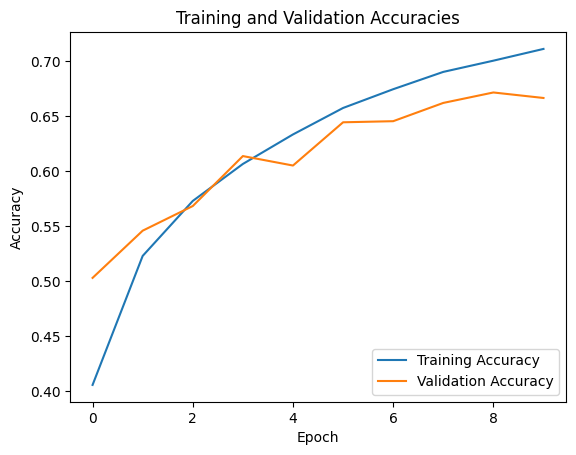

In [2]:
# Train the model
history = model.fit(x_train, y_train, epochs=10, batch_size=64, verbose=0, validation_data=(x_test, y_test))

# Plot accuracies
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracies')
plt.show()

##Problem 2.

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC, SVC
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_breast_cancer

# Load the dataset
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target
display(X.head())

features = ['worst compactness', 'worst concavity', 'worst area']
X = X[features]
display(X.head())

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


,worst compactness,worst concavity,worst area
0,0.6656,0.7119,2019.0
1,0.1866,0.2416,1956.0
2,0.4245,0.4504,1709.0
3,0.8663,0.6869,567.7
4,0.2050,0.4000,1575.0


###Problem 2a.

In [13]:
lin_svm = Pipeline([
    ('scaler', StandardScaler()),
    ('linear_svm', LinearSVC(loss='hinge'))
])

lin_svm.fit(X_train, y_train)
y_pred_linear = lin_svm.predict(X_test)

# Calculate and print the accuracy
accuracy_linear = accuracy_score(y_test, y_pred_linear)
print(f"Accuracy with linear kernel: {accuracy_linear}")

Accuracy with linear kernel: 0.9912280701754386


###Problem 2b.

In [14]:
rbf_svm = Pipeline([
    ('scaler', StandardScaler()),
    ('rbf_svm', SVC(kernel='rbf', C=2))
])

rbf_svm.fit(X_train, y_train)
y_pred_rbf = rbf_svm.predict(X_test)

# Calculate and print the accuracy
accuracy_rbf = accuracy_score(y_test, y_pred_rbf)
print(f"Accuracy with RBF kernel (C=2): {accuracy_rbf}")

Accuracy with RBF kernel (C=2): 0.9649122807017544
